## E-commerce dataset by Olist
#### The Brazilian e-commerce dataset by Olist as an SQLite database file
Dataset: https://www.kaggle.com/datasets/terencicp/e-commerce-dataset-by-olist-as-an-sqlite-database

Free MySQL DB: https://www.pingcap.com/

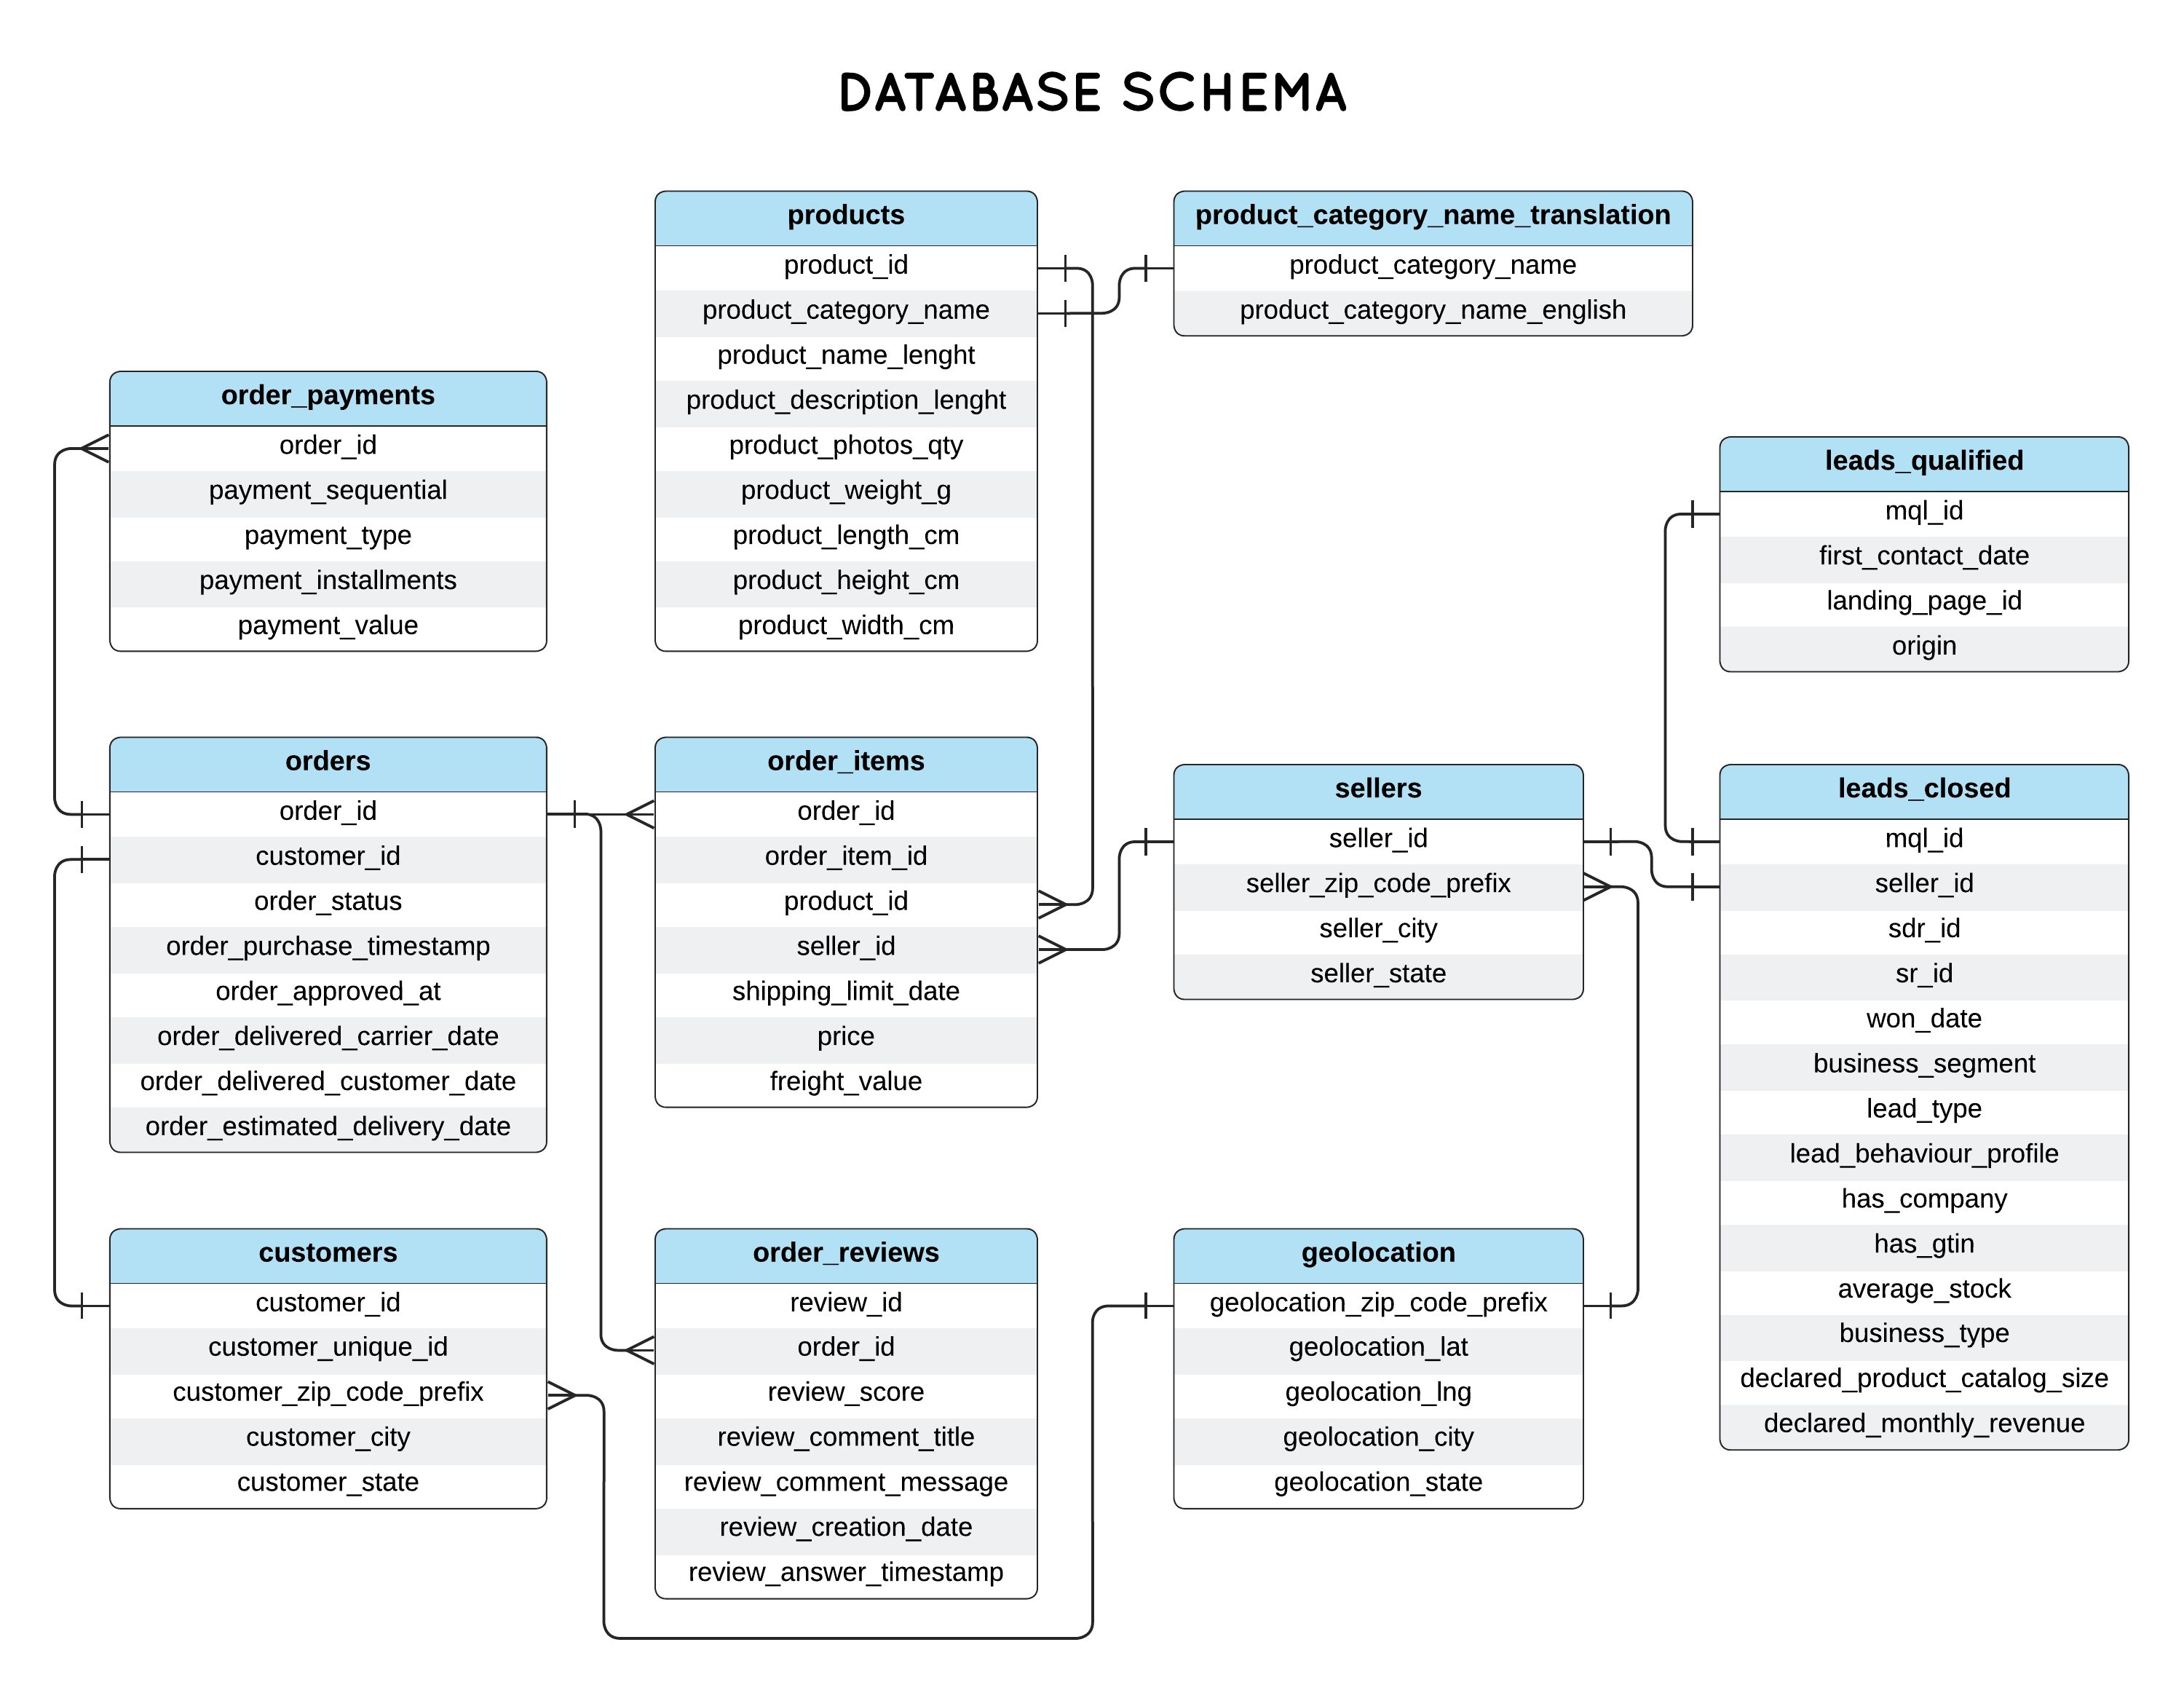

In [5]:
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import base64
import pandas as pd
import time

root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

from dotenv import load_dotenv
load_dotenv()

import sqlite3, pymysql

In [13]:
sqlite_conn = sqlite3.connect('db/olist.sqlite')
sqlite_cur = sqlite_conn.cursor()

In [14]:
mysql_conn = pymysql.connect(
    host=os.getenv("MYSQL_HOST"),
    port=int(os.getenv('MYSQL_PORT')),
    user=os.getenv("MYSQL_USER"),
    password=os.getenv("MYSQL_PASSWORD"),
    ssl = {'ssl': {}}
)
mysql_cur = mysql_conn.cursor()

In [15]:
mysql_cur.execute("CREATE DATABASE IF NOT EXISTS ecommerce")
mysql_cur.execute("USE ecommerce")

0

In [16]:
# Get all tables from SQLite
sqlite_cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = [row[0] for row in sqlite_cur.fetchall()]

# Copy each table
for table in tables:
    print(f"Copying table: {table}")
    
    # Get column info
    sqlite_cur.execute(f"PRAGMA table_info({table})")
    columns = [f"{col[1]} TEXT" for col in sqlite_cur.fetchall()]
    
    # Create table in MySQL
    mysql_cur.execute(f"CREATE TABLE IF NOT EXISTS {table} ({', '.join(columns)})")
    
    # Copy data
    sqlite_cur.execute(f"SELECT * FROM {table}")
    rows = sqlite_cur.fetchall()
    
    if rows:
        placeholders = ", ".join(["%s"] * len(rows[0]))
        mysql_cur.executemany(f"INSERT INTO {table} VALUES ({placeholders})", rows)
    
    mysql_conn.commit()

print("Done!")

# Close connections
sqlite_conn.close()
mysql_conn.close()

Copying table: product_category_name_translation
Copying table: sellers
Copying table: customers
Copying table: geolocation
Copying table: order_items
Copying table: order_payments
Copying table: order_reviews
Copying table: orders
Copying table: products
Copying table: leads_qualified
Copying table: leads_closed
Done!
